In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the CSV File
df = pd.read_csv(r'C:\Users\AMUS\python\Yolov8_overall\yolo8x_overall.csv')

# Step 2: Preprocess the Data
# Convert categorical columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
df['Person ID'] = label_encoder.fit_transform(df['Person ID'])
df['Test ID'] = label_encoder.fit_transform(df['Test ID'])
df['Seat ID'] = label_encoder.fit_transform(df['Seat ID'])


columns_to_drop = ['Image', 'Time', 'Date', 'Keypoint', 'Minutes_Seconds', 'Main Timestamp']
df = df.drop(columns=columns_to_drop, axis=1)

# Define Features (X) and Target (y)
X = df.drop('HeadAll_Temperature', axis=1)  # Drop the target column
y = df['HeadAll_Temperature']  # Target column

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='mae')
model.fit(X_train, y_train)

# Step 5: Make Predictions and Evaluate
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.11132671988167912


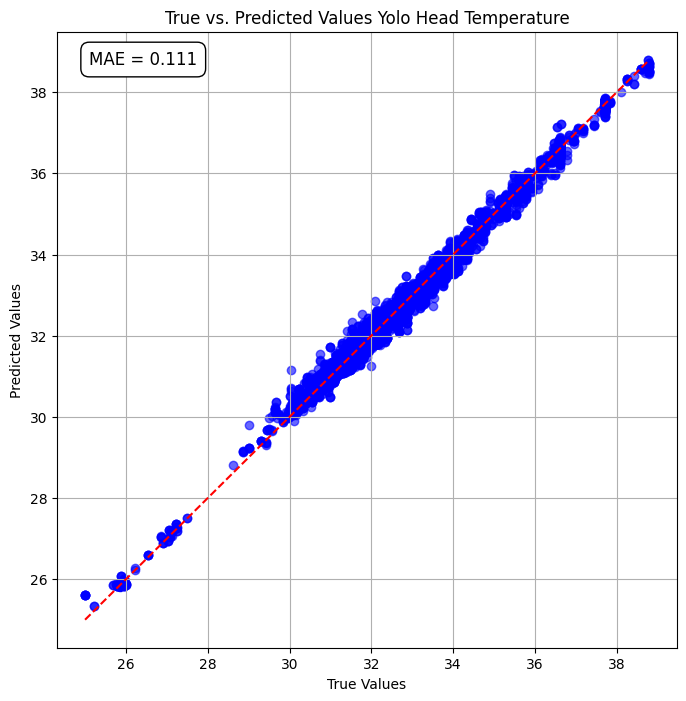

In [2]:
import matplotlib.pyplot as plt

# Scatter plot of True vs. Predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.text(x=min(y_test) + 0.1, y=max(y_test) - 0.1,  # Adjust position for readability
         s=f'MAE = {mae:.3f}', fontsize=12, color='black',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values Yolo Head Temperature')
plt.grid(True)
plt.show()


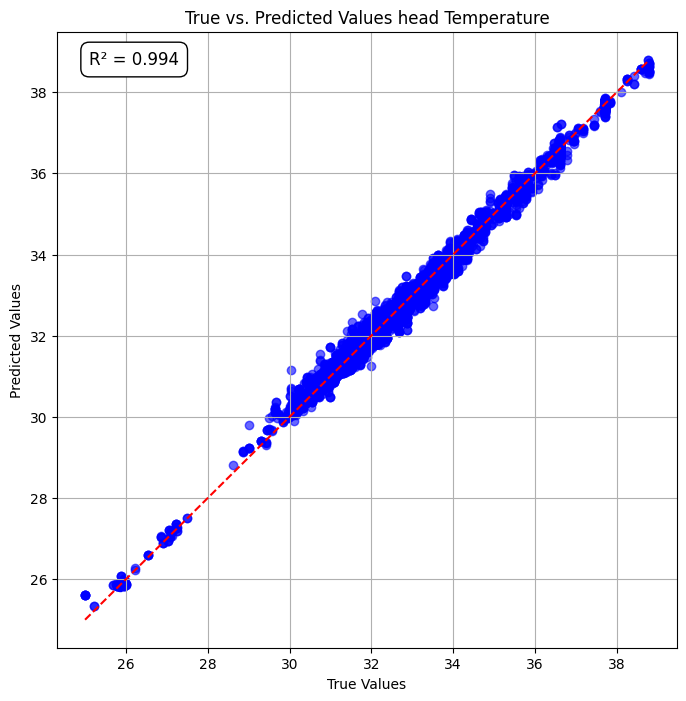

In [3]:
from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Scatter plot of True vs. Predicted values with R-squared
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.text(x=min(y_test) + 0.1, y=max(y_test) - 0.1,  # Adjust position for readability
         s=f'R² = {r_squared:.3f}', fontsize=12, color='black',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values head Temperature')
plt.grid(True)
plt.show()
